In [1]:
# SETUP

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

db_path = 'santos.csv'
plot_path = 'plt.jpg'
# db_path = input("Caminho para .csv:\n -> ")
# plot_path = input("\n\n plot output path:\n -> ")

df = pd.read_csv(db_path, sep=';')

#filtrando internações SUP_MEDIA
#consequente = df[(df.internacao=='inf_media') | (df.internacao=='sup_media') ]
consequente = df[df['internacao'] != 'inf_media'].dropna()
consequente = consequente.reset_index(drop=True)
consequente


,Data,MP10,MP25,NO2,SO2,CO,O3,internacao
0,14/01/2017,inf_media,inf_media,inf_media,inf_media,inf_media,inf_media,sup_media
1,17/02/2017,inf_media,inf_media,inf_media,inf_media,inf_media,inf_media,sup_media
2,25/02/2017,inf_media,inf_media,inf_media,sup_media,inf_media,inf_media,sup_media
3,02/03/2017,inf_media,inf_media,inf_media,inf_media,inf_media,inf_media,sup_media
4,03/03/2017,inf_media,inf_media,inf_media,inf_media,inf_media,inf_media,sup_media
...,...,...,...,...,...,...,...,...
563,04/09/2021,sup_media,inf_media,inf_media,inf_media,inf_media,inf_media,sup_media
564,10/09/2021,inf_media,inf_media,inf_media,inf_media,inf_media,inf_media,sup_media
565,14/09/2021,inf_media,inf_media,inf_media,inf_media,inf_media,inf_media,sup_media
566,16/09/2021,inf_media,inf_media,inf_media,inf_media,inf_media,inf_media,sup_media


In [2]:
#filtrando poluentes SUP_MEDIA
inter_filter = consequente[(consequente.MP25=='sup_media') | (consequente.MP10=='sup_media') | (consequente.CO=='sup_media') | (consequente.SO2=='sup_media') | (consequente.NO2=='sup_media') | (consequente.O3=='sup_media')]
inter_filter = inter_filter.reset_index(drop=True)
inter_filter


,Data,MP10,MP25,NO2,SO2,CO,O3,internacao
0,25/02/2017,inf_media,inf_media,inf_media,sup_media,inf_media,inf_media,sup_media
1,23/03/2017,inf_media,inf_media,inf_media,sup_media,inf_media,inf_media,sup_media
2,24/03/2017,inf_media,inf_media,inf_media,sup_media,inf_media,inf_media,sup_media
3,27/03/2017,inf_media,inf_media,inf_media,sup_media,inf_media,inf_media,sup_media
4,03/04/2017,inf_media,inf_media,inf_media,sup_media,inf_media,inf_media,sup_media
...,...,...,...,...,...,...,...,...
189,23/08/2021,sup_media,sup_media,inf_media,inf_media,inf_media,inf_media,sup_media
190,24/08/2021,sup_media,sup_media,inf_media,inf_media,inf_media,inf_media,sup_media
191,25/08/2021,sup_media,sup_media,inf_media,inf_media,inf_media,inf_media,sup_media
192,26/08/2021,sup_media,sup_media,inf_media,inf_media,inf_media,inf_media,sup_media


In [3]:
# resumo
inter_filter.describe()

,Data,MP10,MP25,NO2,SO2,CO,O3,internacao
count,194,194,194,194,194,194,194,194
unique,194,2,2,1,2,2,1,1
top,04/04/2017,inf_media,inf_media,inf_media,sup_media,inf_media,inf_media,sup_media
freq,1,137,127,194,130,193,194,194


In [4]:
# DETECÇÃO DE PADRÕES

db = {}  # irá armazenar os padrões em dias consecutivos
code = 0 # chave de acesso ao db
for index, row_i in inter_filter.iterrows():
    if index == 0:
        row_0 = row_i

    # salve os tempos iniciais e finais (b e f) do padrão
    b = datetime.datetime.strptime(row_0['Data'], '%d/%m/%Y')    
    f = datetime.datetime.strptime(row_i['Data'], '%d/%m/%Y')
    diff = (f - b).days
    
    # padrão que não se repete em dias consecutivos
    pattern = [
        datetime.datetime.strftime(f, '%d/%m/%y'),
        datetime.datetime.strftime(f, '%d/%m/%y'),
        *row_i[1:]
    ]    
    
    # padrão que se repete em dias consecutivos
    if (row_i[1:].equals(row_0[1:])) and diff <= 1:
                    
        pattern = [
            datetime.datetime.strftime(b, '%d/%m/%y'),
            datetime.datetime.strftime(f, '%d/%m/%y'),
            *row_i[1:]
        ]
    else:
        code += 1
        
    # guarde o padrão no novo db
    if db.get(code, 0):
        db[code][1] = pattern[1] # apenas altera a data f caso já exista
    else:
        db[code] = pattern
    
    # passo
    row_0 = row_i
  

In [5]:
# lista os padrões com os tempos iniciais e finais (b e f)
db


{0: ['25/02/17',
  '25/02/17',
  'inf_media',
  'inf_media',
  'inf_media',
  'sup_media',
  'inf_media',
  'inf_media',
  'sup_media'],
 1: ['23/03/17',
  '24/03/17',
  'inf_media',
  'inf_media',
  'inf_media',
  'sup_media',
  'inf_media',
  'inf_media',
  'sup_media'],
 2: ['27/03/17',
  '27/03/17',
  'inf_media',
  'inf_media',
  'inf_media',
  'sup_media',
  'inf_media',
  'inf_media',
  'sup_media'],
 3: ['03/04/17',
  '05/04/17',
  'inf_media',
  'inf_media',
  'inf_media',
  'sup_media',
  'inf_media',
  'inf_media',
  'sup_media'],
 4: ['14/04/17',
  '14/04/17',
  'inf_media',
  'inf_media',
  'inf_media',
  'sup_media',
  'inf_media',
  'inf_media',
  'sup_media'],
 5: ['20/04/17',
  '20/04/17',
  'inf_media',
  'inf_media',
  'inf_media',
  'sup_media',
  'inf_media',
  'inf_media',
  'sup_media'],
 6: ['01/05/17',
  '01/05/17',
  'inf_media',
  'inf_media',
  'inf_media',
  'sup_media',
  'inf_media',
  'inf_media',
  'sup_media'],
 7: ['03/05/17',
  '04/05/17',
  'sup_med

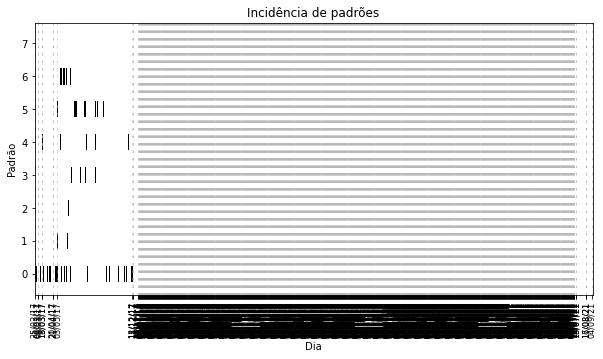

In [6]:
  
# transpor db para voltar ao formato convencional    
db = pd.DataFrame(db).transpose()    
new_col = list((inter_filter.columns).insert(1, 'f'))
new_col[0] = 'b'

# montar um DataFrame com os suportes de cada padrão encontrado em db
db = db.rename(columns={old:new for old, new in zip(db.columns, new_col)})
db_uniques = db.drop(columns=['b', 'f'])

supports = db.groupby(db_uniques.columns.tolist(),as_index=False).size()
supports['frequencia'] = (supports['size'] / db.shape[0]).round(3)

##########################################################################
################### gravar a duração de cada padrão ######################

# conversores de variável temporal
to_datetime = lambda date: datetime.datetime.strptime(date, '%d/%m/%y') # data_string em datetime
to_days     = lambda days_datetime: days_datetime.days                  # datetime em dias_int

# conversões auxiliares das colunas temporais
b_datetime = db['b'].apply(to_datetime)
f_datetime = db['f'].apply(to_datetime)

# calcula a duração de cada padrão e grava em db
duration = (f_datetime - b_datetime).apply(to_days) + 1
db['duration'] = duration

# padrões únicos detectados em db
aux = db.iloc[:, 2:-1]
uniques = aux.drop_duplicates()

# variáveis axiliares para uso posterior
first_day  = b_datetime.iloc[0]
last_day   = f_datetime.iloc[-1]
time_range = (last_day - first_day).days # // 12


###########################################################################
############################ LINHA TEMPORAL ###############################
# conversor datetime para string
to_strftime = lambda date: date.strftime('%d/%m/%y')

# linha temporal de db (taxa de amostragem = 1 dia)
date_line = np.linspace(first_day.value, last_day.value, num=time_range)
date_line = pd.to_datetime(date_line)
date_line = date_line.to_pydatetime()
date_line = pd.Series(date_line).apply(to_strftime)
###########################################################################
###########################################################################
#-------------------------------------------------------------------------#
###########################################################################
######################### METADADOS DO GRÁFICO ############################
data   = {} # armazenar [padrão, início, duração, cor]
colors = {} # armazenar uma cor por padrão detectado

# gerar e gravar em COLORS uma cor aleatória por padrão detectado 
for row in uniques.values:
    colors[str(row)] = np.random.random(3)
    
# gravar em DATA os demais metadados 
for i, row in enumerate(db.values):

    b = row[0]                                      # data inicial
    b_encoded  = to_datetime(b).timetuple().tm_yday # convertida em dia do ano
    zero_point = first_day.timetuple().tm_yday      # marcador de referência (origem temporal)

    
    pattern = str(row[2:-1])         # padrão em string
    left    = b_encoded - zero_point # ponto inicial no gráfico
    width   = row[-1]                # largura da barra no gráfico (duração do padrão)
    color   = colors[pattern]        # cor da barra no gráfico
    
    # gravação
    data[i] = {'pattern': pattern,
               'left': left,
               'width': width,
               'color': color}
###########################################################################
###########################################################################
#-------------------------------------------------------------------------#
###########################################################################
################################# PLOT ####################################

# XTICKLABELS (RAW)
x = np.arange(date_line.shape[0])
last_event = 0 # var auxiliar para editar x

# ------------------------------------- #
fig, ax = plt.subplots(figsize=(10, 5))

for i, key in enumerate(data):
    
    # recupere os metadados gravados em DATA
    y = data[key]['pattern']
    width = data[key]['width']
    left = data[key]['left']
    color = data[key]['color']
    
    # horizontal bar plot
    ax.barh(y, width, height=0.5, left=left, color='black', linewidth=10)
    
    ########## edição de XTICKLABELS ###############
    if width > 1:                         # evento
        x[left+1: left+width] = '-1'      
    
    if (left - last_event > 1) & (i > 1): # não evento
        x[last_event+1: left] = '-1'      
    
    last_event = left+width               # update 


# recuperar tick labels
xticks       = x
xtickslabels = date_line.values

yticks       = np.arange(uniques.shape[0])
ytickslabels = np.arange(uniques.shape[0])

# plotar
# ax.set_yticks(np.arange(uniques.shape[0]))

ax.set_xticks(xticks)
ax.set_xticklabels(xtickslabels, rotation=90)
ax.tick_params(axis='x', labelsize=8)
plt.xlim(0, time_range+1)

ax.set_yticks(yticks)
ax.set_yticklabels(ytickslabels)

plt.xlabel("Dia")
plt.ylabel("Padrão")
plt.grid(which='major', axis='x', linestyle=(0, (5, 10)), linewidth=.5)
plt.title("Incidência de padrões")
plt.savefig(plot_path)
plt.show()

In [7]:
supports

,MP10,MP25,NO2,SO2,CO,O3,internacao,size,frequencia
0,inf_media,inf_media,inf_media,inf_media,sup_media,inf_media,sup_media,1,0.007
1,inf_media,inf_media,inf_media,sup_media,inf_media,inf_media,sup_media,63,0.434
2,inf_media,sup_media,inf_media,inf_media,inf_media,inf_media,sup_media,21,0.145
3,inf_media,sup_media,inf_media,sup_media,inf_media,inf_media,sup_media,17,0.117
4,sup_media,inf_media,inf_media,inf_media,inf_media,inf_media,sup_media,20,0.138
5,sup_media,inf_media,inf_media,sup_media,inf_media,inf_media,sup_media,2,0.014
6,sup_media,sup_media,inf_media,inf_media,inf_media,inf_media,sup_media,9,0.062
7,sup_media,sup_media,inf_media,sup_media,inf_media,inf_media,sup_media,12,0.083
